In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import DMsimulator as DMsim
from DMoptimize import Optimize

In [2]:

#########* Constants and fixed parameters of the model
const_dict = {
        "F0": 1.5e15,           # cm^-2
        "S0": 3e13,             # cm^-2
        
        "R": 0.00831442,        # kJ/mol*K
        "kBoltz": 1.380649e-23, # J/K
}

#########* Steric factors reactions
steric_dict = {
        ###* Atomic oxygen
        "SF_O_F": 1.0, "SF_O_S": 1.0, "SF_O_SO": 1.0, "SF_O_FO": 1.0,
        "SF_FO_S": 1.0, "SF_FO_SO": 1.0, "SF_FO_FO": 1.0, "SF_FO": 1.0,
        
        ###* Molecular oxygen
        "SF_O2_F": 1.0, "SF_O2_FO": 1.0, "SF_O2_FO2": 1.0, "SF_O_FO2": 1.0,
        "SF_FO2_FO": 1.0, "SF_FO_FO2": 1.0, "SF_FO2": 1.0,
        
        ###* Metastable species
        "SF_O2fast_SO": 0.0, "SF_Ofast_SO": 0.0, "SF_O2fast_S": 0.0,  "SF_Ofast_S": 0.0,
        "SF_Ofast_Sdb": 0.0, "SF_Ofast_SOdb": 0.0, "SF_O2fast_Sdb": 0.0, "SF_O2fast_SOdb": 0.0,
        "SF_O_Sdb": 0.0, "SF_O_SOdb": 0.0, "SF_FO_SOdb": 0.0, "SF_FO_Sdb": 0.0,
}

#########* Energy barriers  --  Based Model
energy_dict = { # kJ/mol and s^-1
        "E_O_F": 0.0, "E_O_S": 0.0, "E_O_SO": 15.0, "E_O_FO": 0.0, 
        "E_FO_SO": 20.0, "E_FO_FO":0.0, "E_di_O": 15.0, "E_de_O": 30.0,
        
        "E_O2_F": 0.0, "E_O2_FO": 0.0, "E_O2_FO2": 0.0, "E_O_FO2": 0.0, 
        "E_FO2_FO": 0.0, "E_FO_FO2": 0.0, "E_di_O2": 15.0, "E_de_O2": 17.5,
        
        "E_O2fast_SO": 0.0, "E_O2fast_S": 0.0, "E_O2fast_SOdb": 0.0, "E_O2fast_Sdb": 0.0, "E_Ofast_Sdb": 0.0,
        "E_Ofast_SOdb": 0.0, "E_O_Sdb": 0.0, "E_O_SOdb": 0.0, "E_F_SOdb": 0.0, "E_FO_SOdb": 0.0,
        "ED_db": 14.999,
        
        "nu_D": 1.0e13, "nu_d": 1.0e15,
        "Emin": 2.90, # eV
        "Ealpha": 3400.0, # K

}

file_input_data = "Experimental_data_Paper.hdf5"


In [3]:
class MyOptimize(Optimize):
    
    def modify_energy_dict(self, params, counter):
        
        A, B, E_nu_d = params
        Tw = self.input_data_dict[counter]['Tw']
        R = self.const_dict['R']
        
        nu_d = 1e15 * (A + B * np.exp(E_nu_d / (R * Tw)))
        
        self.energy_dict_base['nu_d'] = nu_d
        
        return self.energy_dict_base
        

In [4]:
loss_func = lambda x: x**2
global_bounds = [(1e-7, 0.5), (1e-8, 0.5), (5.0, 30.0)]
input_dim = global_bounds.__len__()

opt = MyOptimize(const_dict, steric_dict, energy_dict, file_input_data, loss_func, input_dim=input_dim, max_time=15)


config_opt_dict = {
    "bounds": global_bounds,
    "nb_de_calls": 3, # 5
    "de_maxiter": 10,
    "top_k": 1,
    "local_attempts": 2,
    "epsilon_local": 1e-2
}



In [5]:
loss_initial = opt.functional_loss(np.array([1.0, 0.0, 0.0]))
print(loss_initial)

loss_paper = opt.functional_loss(np.array([0.01634, 1.67e-4, 19.75]))
print(loss_paper)

0.7632831758312908
0.1276282213314948


In [6]:

#### Call the optimization routine

best_local, best_local_loss = opt.hybrid_search(config_opt_dict)



Loss:  0.6559034996362929 Params:  [0.08027655 0.43536394 7.57145186]
Loss:  0.681245535091918 Params:  [0.48181553 0.47644611 9.15810697]
Loss:  0.7003965279501561 Params:  [ 0.36983282  0.22924875 25.96133829]
Loss:  0.5392250862411426 Params:  [0.03666403 0.24805169 6.23600866]
Loss:  0.6850465716045854 Params:  [ 0.29372841  0.04078186 15.38569434]
Loss:  0.6989579152702243 Params:  [ 0.21654267  0.3720221  15.67547563]
Loss:  0.7004205534733484 Params:  [ 0.28308658  0.38975284 27.90263073]
Loss:  0.6827170598539979 Params:  [ 0.20932478  0.30628731 10.37967616]
Loss:  0.6896473663902357 Params:  [ 0.23352622  0.06966154 14.95687296]
Loss:  0.6868705999530444 Params:  [ 0.04888808  0.13404602 12.91332561]
Loss:  0.6209251681646815 Params:  [0.08249061 0.12741003 9.15810697]
Loss:  0.3966615754473597 Params:  [0.04227309 0.11563282 6.65859459]
Loss:  0.6953452105520386 Params:  [ 0.03666403  0.24805169 13.73260041]
Loss:  0.1973808774340393 Params:  [ 0.04625308  0.01363328 10.1874

In [7]:

loss_initial = opt.functional_loss(np.array([1.0, 0.0, 0.0]))
loss_paper = opt.functional_loss(np.array([0.01634, 1.67e-4, 19.75]))

loss_final = opt.functional_loss(best_local)

print("Gain: ", np.abs(loss_paper - loss_final)/loss_paper*100)

print("Nb of calls: ", opt.nb_calls)


print("Initial loss: ", loss_initial)
print("Paper loss: ", loss_paper)
print("Final loss: ", loss_final)

Loss:  0.1088835912442221 Params:  [5.74040394e-03 6.02475063e-04 1.69206221e+01]
Gain:  14.6869006648509
Nb of calls:  4525
Initial loss:  0.7632831758312908
Paper loss:  0.1276282213314948
Final loss:  0.1088835912442221


In [8]:
print("best_local: ", best_local)
# Loss:  6.967500987552882e-06 Params:  [0.06815468, 0.00013756]


# Initial loss:  0.6004431685912233
# Paper loss:  0.11493457128292281
# Final loss:  0.1006244818002997
# Gain:  12.450639805665961
# Nb of calls:  1358

### best_local:  [0.10519756 0.00013952]


# Loss:  0.10062448228726699 Params:  [0.10518383 0.00013952]
# Gain:  12.45063938197509
# Nb of calls:  1780
# Initial loss:  0.6004431685912233
# Paper loss:  0.11493457128292281
# Final loss:  0.10062448228726699

best_local:  [5.74040394e-03 6.02475063e-04 1.69206221e+01]


In [9]:
#### sensibility analysis

perturbation = np.linspace(-1.0, 1.0, 30)
costs = []
for i in range(len(perturbation)):
    costs_aux = []
    for j in range(len(best_local)):
        params = best_local.copy()
        params[j] += 0.1*params[j]*perturbation[i]
        cost = opt.functional_loss(params)
        costs_aux.append(cost)
    costs.append(costs_aux)

costs = np.array(costs)

Loss:  0.12480557554722106 Params:  [5.74040394e-03 5.46382557e-04 1.69206221e+01]
Loss:  0.10888435871219133 Params:  [5.28513052e-03 6.02475063e-04 1.69206221e+01]
Loss:  1.1802979763367802 Params:  [5.74040394e-03 6.02475063e-04 1.56953357e+01]
Loss:  0.11458542987599116 Params:  [5.74040394e-03 5.67157559e-04 1.69206221e+01]
Loss:  0.108883832120388 Params:  [5.48307548e-03 6.02475063e-04 1.69206221e+01]
Loss:  0.28705410231105244 Params:  [5.74040394e-03 6.02475063e-04 1.62788054e+01]
Loss:  0.1097608490020864 Params:  [5.74040394e-03 5.87932561e-04 1.69206221e+01]
Loss:  0.10888360242230177 Params:  [5.68102045e-03 6.02475063e-04 1.69206221e+01]
Loss:  0.10981561870332932 Params:  [5.74040394e-03 6.02475063e-04 1.68622752e+01]
Loss:  0.10902998656299555 Params:  [5.74040394e-03 6.08707564e-04 1.69206221e+01]
Loss:  0.10888366852885745 Params:  [5.87896541e-03 6.02475063e-04 1.69206221e+01]
Loss:  0.15858197391478812 Params:  [5.74040394e-03 6.02475063e-04 1.74457449e+01]
Loss:  0

Text(0, 0.5, 'Avg Loss')

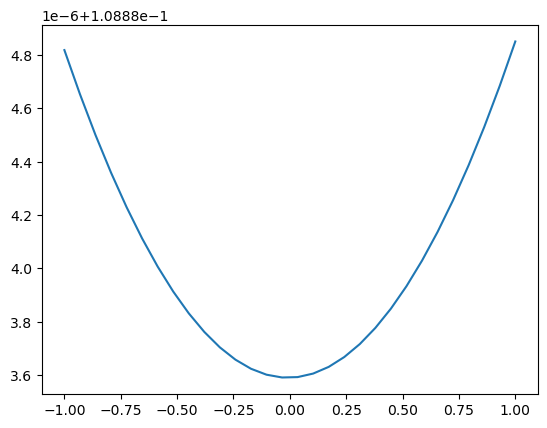

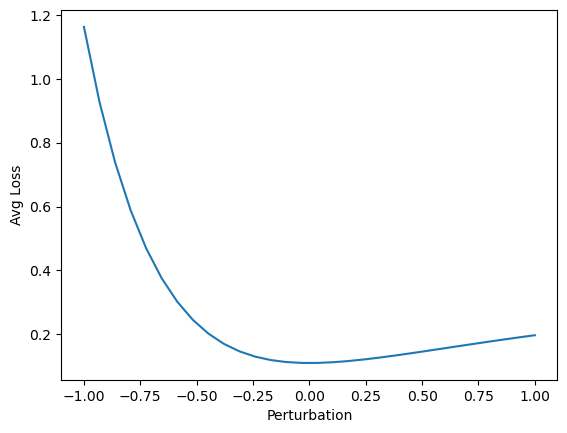

In [10]:
costs = np.array(costs)
# print(costs)

plt.figure()
plt.plot(perturbation, costs[:, 0], label='A')

plt.figure()
# plt.plot(perturbation, costs[:, 1], label='B')
plt.plot(perturbation, np.mean(costs, axis=1), label='Total')
plt.xlabel('Perturbation')
plt.ylabel('Avg Loss')
# plt.savefig("figures/sensibility_analysis.png")

In [11]:
### remove very large values

surf_buffer = opt.buffer.copy()
surf_buffer[surf_buffer[:, 0] > 1.0] = np.nan

Text(0, 0.5, 'Loss')

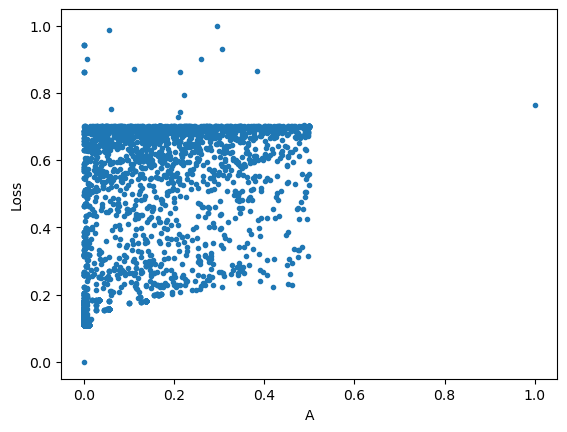

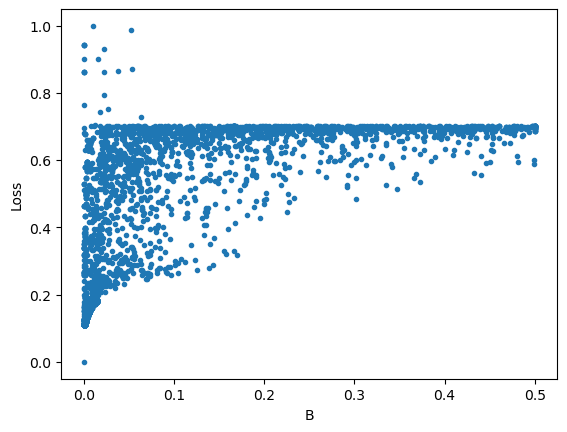

In [12]:


plt.figure()
plt.plot(surf_buffer[:, 1], surf_buffer[:, 0], '.')
plt.xlabel('A')
plt.ylabel('Loss')



plt.figure()
plt.plot(surf_buffer[:, 2], surf_buffer[:, 0], '.')
plt.xlabel('B')
plt.ylabel('Loss')

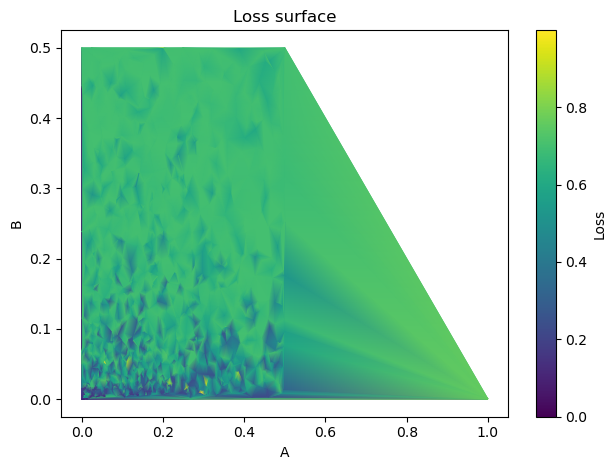

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

surf_buffer_trig = surf_buffer[~np.isnan(surf_buffer).any(axis=1)]

x = surf_buffer_trig[:, 1]
y = surf_buffer_trig[:, 2]
z = surf_buffer_trig[:, 0]
# Create triangulation
triang = tri.Triangulation(x, y)

# Plot using tripcolor
plt.figure()
plt.tripcolor(triang, z, shading='gouraud', cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss surface')
# plt.axis('equal')
plt.tight_layout()
plt.show()


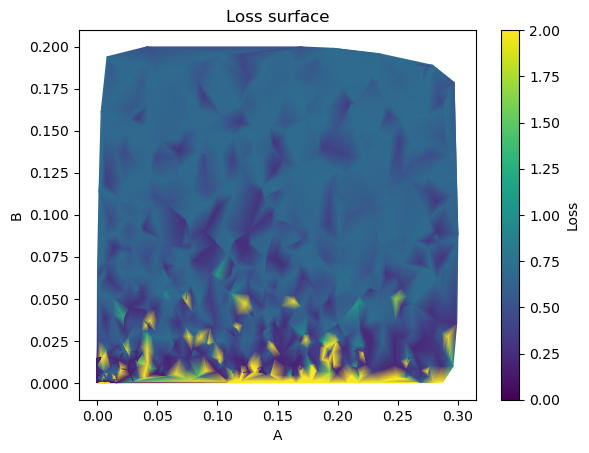

In [14]:

surf_buffer_trig2 = opt.buffer.copy()
surf_buffer_trig2[surf_buffer_trig2[:, 0] > 2.0, 0] = 2.0


x = surf_buffer_trig2[:, 1]
y = surf_buffer_trig2[:, 2]
z = surf_buffer_trig2[:, 0]

xmin, xmax = np.min(x), 3e-1
ymin, ymax = np.min(y), 2e-1

mask = (x >= xmin) & (x <= xmax) & (y >= ymin) & (y <= ymax)

# Apply mask
x_sub = x[mask]
y_sub = y[mask]
z_sub = z[mask]


# Create triangulation
triang_sub = tri.Triangulation(x_sub, y_sub)
triangles = triang_sub.triangles
xtri = x_sub[triangles].mean(axis=1)
ytri = y_sub[triangles].mean(axis=1)

tri_mask = (xtri < xmin) | (xtri > xmax) | (ytri < ymin) | (ytri > ymax)
triang_sub.set_mask(tri_mask)


plt.figure()
plt.tripcolor(triang_sub, z_sub, shading='gouraud', cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss surface')
# plt.axis('equal')
# plt.tight_layout()
plt.gca().set_aspect('auto')
plt.show()